In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('/content/tweet_emotions.csv')

In [ ]:
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
df['sentiment'] = pd.Categorical(df['sentiment'])
df['sentiment'] = df.sentiment.cat.codes

In [ ]:
df

,tweet_id,sentiment,content
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,10,Funeral ceremony...gloomy friday...
3,1956967789,3,wants to hang out with friends SOON!
4,1956968416,8,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,8,@JohnLloydTaylor
39996,1753919001,7,Happy Mothers Day All my love
39997,1753919005,7,Happy Mother's Day to all the mommies out ther...
39998,1753919043,5,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
labels = np.array(df['sentiment'])
labels[:5]

array([ 2, 10, 10,  3,  8], dtype=int8)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

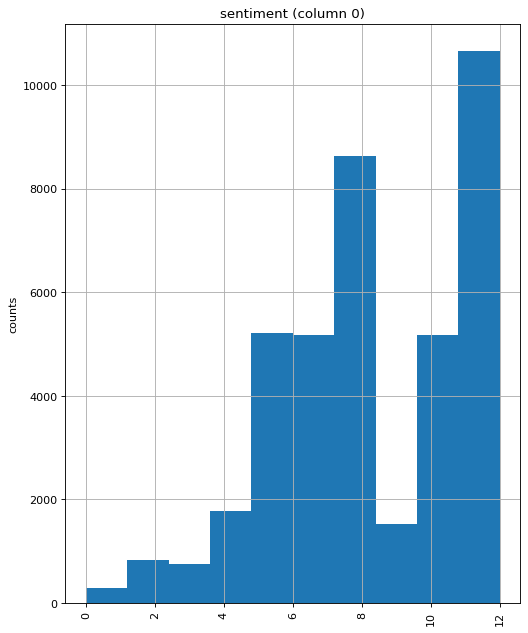

In [ ]:
plotPerColumnDistribution(df, 10, 5)